In [99]:
import scipy.io
import numpy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from multiprocessing import Pool
from scipy import stats
import math

In [100]:
SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Lineplots first!
## Odd is Accuracy Even is Speed

## 0 1 are sudden

In [78]:
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [79]:
def lineplots(data, block, first, last):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))

    for i in range(first,last):
        plt.plot(traj['x'][0][i][0], traj['y'][0][i][0])


In [80]:
interact(lineplots, data = widgets.ToggleButtons(options = list(range(1, 59))), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1),
        first = widgets.IntSlider(max = 63, min = 0, value = 0, step = 1), last = widgets.IntSlider(max = 64, min = 1, value = 1, step = 1))

interactive(children=(ToggleButtons(description='data', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

<function __main__.lineplots(data, block, first, last)>

## Error Vs Time plots

Divide Trajectories by 5. Calculate mean and standard deviation of difference between ideal and actual trajectories (both divided by 5) for all 64 trajectories in a block. 
From the movement time, calculate how long it took to finish each of these 5 trajectories. Calculate mean and standard deviation across 64 trials. 

This might as well just be equal to the mean and standard deviation of the **number** of points in each of those five quantiles for all trajectories.



# Error Calculation
Takes in a trajectory loaded from the mat file and calculates error by comparing minimum distance from x and y coordinates of the actual trajectory to the ideal trajectory

In [3]:
#square_coord = scipy.io.loadmat('data/pilot/pilot_1/squares/coordinates/squares3.mat')
#traj = scipy.io.loadmat('data/pilot/pilot_1/actual_trajectories/trajectories3.mat')
#def calc_error(traj, square_coord):
# The version above uses square coordinates
def calc_error(traj):    
    error = list()
    for j in range(64):
        traj_dist = list()
        trajx, trajy = traj['x'][0][j][0], traj['y'][0][j][0]
        #end_pointx, end_pointy  = square_coord['squareX'][0][j], square_coord['squareY'][0][j]
        end_pointx, end_pointy  = traj['x'][0][j][0][-1], traj['y'][0][j][0][-1]

        xline = numpy.linspace(0, end_pointx, 500)
        yline = numpy.linspace(0, end_pointy, 500)

        for i in range(len(trajx)):
            xdist = min(numpy.absolute(xline-trajx[i]))
            ydist = min(numpy.absolute(yline-trajy[i]))
            dist = numpy.sqrt(xdist**2 + ydist**2)
            traj_dist.append(dist)
        error.append(traj_dist)
    return error
#dist = numpy.linalg.norm(numpy.cross(p2-p1, p1-p3))/numpy.linalg.norm(p2-p1)

In [4]:
#traj['x'][0][0][0][-1]

In [5]:
#calc_error(traj, square_coord)

Participant 1 Gradual Change Accuracy emphasis

Participant 2 Sudden change Accuracy emphasis

Participant 3 Gradual change Speed emphasis

# Time quintiles:
X axis is cummulative sum of the number of samples in the trajectory, averaged across all trajectories. 
Y axis is the mean of error in that time quantile, averaged across all trajectories


In [4]:
def errorvstime(data, block):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/participants/data{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)[:64]
    #error = xdiff**2+ydiff**2
    #print (error)
    error_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(error[i])
        for j in range(5):
#            error_means[i, j] = numpy.mean(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
            error_means[i, j] = numpy.median(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
         #error_means[i, ] = error_means[i, ]/max(error_means[i,])

    
    time_means = numpy.zeros((64, 5))

    for i in range(64):
        n = len(error[i])
        for j in range(5):
            time_means[i, j] = len(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.mean(error_means, axis = 0), xerr = stat.sem(time_means, axis = 0), yerr = stat.sem(error_means, axis = 0))
    plt.ylabel('Error')
    plt.xlabel('Time')
    plt.xlim(0, 100)
    plt.ylim(-20, 70)
    return times, numpy.mean(error_means, axis = 0)

Calculate error vs time for each block collapsed across participants.

C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


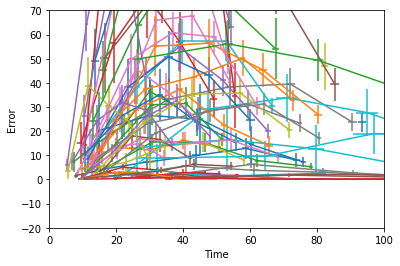

In [5]:
times = numpy.zeros((59, 5))
errors = numpy.zeros((59, 5))
for i in range(1, 59):
    if i == 7:
        continue
    temp = errorvstime(i, 11)
    times[i] = temp[0]
    errors[i] = temp[1] 
    #print (i)

In [10]:
times_speed_sudden = numpy.zeros((59, 5))
times_speed_gradual = numpy.zeros((59, 5))
times_accuracy_sudden = numpy.zeros((59, 5))
times_accuracy_gradual = numpy.zeros((59, 5))
errors_speed_sudden = numpy.zeros((59, 5))
errors_speed_gradual = numpy.zeros((59, 5))
errors_accuracy_sudden = numpy.zeros((59, 5))
errors_accuracy_gradual = numpy.zeros((59, 5))
for i in range(len(times)):
    if i%4 == 0:
        times_speed_sudden[i] = times[i]
        errors_speed_sudden[i] = errors[i]
    elif i%4 == 1:
        times_accuracy_sudden[i] = times[i]
        errors_accuracy_sudden[i] = errors[i]
    elif i%4 == 2:
        times_speed_gradual[i] = times[i]
        errors_speed_gradual[i] = errors[i]
    elif i%4 == 3:
        times_accuracy_gradual[i] = times[i]
        errors_accuracy_gradual[i] = errors[i]
       

In [11]:
times_speed_gradual = numpy.reshape(times_speed_gradual[numpy.nonzero(times_speed_gradual)], (int(len(times_speed_gradual[numpy.nonzero(times_speed_gradual)])/5), 5))
errors_speed_gradual = numpy.reshape(errors_speed_gradual[numpy.nonzero(errors_speed_gradual)], (int(len(errors_speed_gradual[numpy.nonzero(errors_speed_gradual)])/5), 5))
times_speed_sudden = numpy.reshape(times_speed_sudden[numpy.nonzero(times_speed_sudden)], (int(len(times_speed_sudden[numpy.nonzero(times_speed_sudden)])/5), 5))
errors_speed_sudden = numpy.reshape(errors_speed_sudden[numpy.nonzero(errors_speed_sudden)], (int(len(errors_speed_sudden[numpy.nonzero(errors_speed_sudden)])/5), 5))
times_accuracy_gradual = numpy.reshape(times_accuracy_gradual[numpy.nonzero(times_accuracy_gradual)], (int(len(times_accuracy_gradual[numpy.nonzero(times_accuracy_gradual)])/5), 5))
errors_accuracy_gradual = numpy.reshape(errors_accuracy_gradual[numpy.nonzero(errors_accuracy_gradual)], (int(len(errors_accuracy_gradual[numpy.nonzero(errors_accuracy_gradual)])/5), 5))
times_accuracy_sudden = numpy.reshape(times_accuracy_sudden[numpy.nonzero(times_accuracy_sudden)], (int(len(times_accuracy_sudden[numpy.nonzero(times_accuracy_sudden)])/5), 5))
errors_accuracy_sudden = numpy.reshape(errors_accuracy_sudden[numpy.nonzero(errors_accuracy_sudden)], (int(len(errors_accuracy_sudden[numpy.nonzero(errors_accuracy_sudden)])/5), 5))


In [12]:
times_speed_sudden

array([[  9.453125,  19.28125 ,  29.125   ,  38.953125,  49.171875],
       [ 10.375   ,  21.15625 ,  32.015625,  42.796875,  54.046875],
       [ 18.328125,  36.96875 ,  55.75    ,  74.390625,  93.515625],
       [  5.375   ,  11.140625,  16.859375,  22.625   ,  28.765625],
       [ 11.21875 ,  22.796875,  34.484375,  46.0625  ,  58.0625  ],
       [  9.921875,  20.1875  ,  30.609375,  40.875   ,  51.5625  ],
       [  6.46875 ,  13.28125 ,  20.171875,  26.984375,  34.234375],
       [ 11.609375,  23.640625,  35.65625 ,  47.6875  ,  60.09375 ],
       [ 10.5     ,  21.34375 ,  32.234375,  43.078125,  54.34375 ],
       [  5.59375 ,  11.625   ,  17.734375,  23.765625,  30.21875 ],
       [ 26.40625 ,  53.34375 ,  80.296875, 107.234375, 134.484375],
       [ 13.28125 ,  27.      ,  40.640625,  54.359375,  68.453125],
       [ 13.609375,  27.546875,  41.53125 ,  55.46875 ,  69.890625],
       [  6.921875,  14.296875,  21.625   ,  29.      ,  36.703125]])

In [ ]:
#numpy.mean(times_accuracy_gradual, axis = 0)
#numpy.nanmean(errors_speed_sudden, axis = 0)
#stat.sem(times_accuracy_gradual, axis = 0)
#numpy.nanstd(errors_accuracy_gradual, axis = 0)/numpy.sqrt(errors_accuracy_gradual)
#numpy.nanstd(errors_accuracy_gradual)

numpy.shape(numpy.nonzero(times_accuracy_sudden))

Text(0,0.5,'Error')

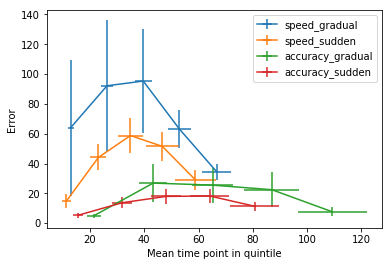

In [19]:
fig,(ax1)=plt.subplots(1,1)
ax1.errorbar(numpy.nanmean(times_speed_gradual, axis = 0), numpy.nanmean(errors_speed_gradual, axis = 0), xerr=stat.sem(times_speed_gradual, axis = 0), yerr=numpy.nanstd(errors_speed_gradual, axis = 0)/numpy.sqrt(len(errors_speed_gradual)), label = "speed_gradual")
ax1.errorbar(numpy.nanmean(times_speed_sudden, axis = 0), numpy.nanmean(errors_speed_sudden, axis = 0), xerr=stat.sem(times_speed_sudden, axis = 0), yerr=numpy.nanstd(errors_speed_sudden, axis = 0)/numpy.sqrt(len(errors_speed_sudden)), label = "speed_sudden")
ax1.errorbar(numpy.nanmean(times_accuracy_gradual, axis = 0), numpy.nanmean(errors_accuracy_gradual, axis = 0), xerr=stat.sem(times_accuracy_gradual, axis = 0), yerr=numpy.nanstd(errors_accuracy_gradual, axis = 0)/numpy.sqrt(len(errors_accuracy_gradual)), label = "accuracy_gradual")
ax1.errorbar(numpy.nanmean(times_accuracy_sudden, axis = 0), numpy.nanmean(errors_accuracy_sudden, axis = 0), xerr=stat.sem(times_accuracy_sudden, axis = 0), yerr=numpy.nanstd(errors_accuracy_sudden, axis = 0)/numpy.sqrt(len(errors_accuracy_sudden)), label = "accuracy_sudden")
ax1.legend()
plt.xlabel('Mean time point in quintile')
plt.ylabel('Error')


# Time Bar plots

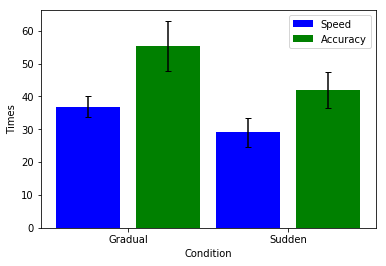

In [22]:
pos = [0, 1, 2, 3]
handles = plt.bar(pos, [numpy.median(times_speed_gradual), numpy.median(times_accuracy_gradual), numpy.median(times_speed_sudden), numpy.median(times_accuracy_sudden)], yerr = [numpy.mean(stat.sem(times_speed_gradual)), numpy.mean(stat.sem(times_accuracy_gradual)), numpy.mean(stat.sem(times_speed_sudden)), numpy.mean(stat.sem(times_accuracy_sudden))], color = ['Blue', 'Green', 'Blue', 'Green'], capsize = 3)
plt.xticks([0.5, 2.5], ['Gradual', 'Sudden'])
plt.ylabel('Times')
plt.xlabel('Condition')

plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
#handles[0]

In [ ]:
numpy.ravel(times_accuracy_gradual)

In [ ]:
pos = [1, 2]
yerr = [numpy.mean(stat.sem(numpy.concatenate((times_speed_gradual, times_accuracy_gradual)))), numpy.mean(stat.sem(numpy.concatenate((times_speed_sudden, times_accuracy_sudden))))]
plt.bar(pos, [numpy.mean(numpy.concatenate((times_speed_gradual, times_accuracy_gradual))), numpy.mean(numpy.concatenate((times_speed_sudden, times_accuracy_sudden)))], yerr = yerr, color = 'blue')
plt.xticks(pos, ['Gradual', 'Sudden'])
plt.ylabel('Times')
plt.xlabel('Condition')


In [ ]:
pos = [0, 1]
yerr = [numpy.mean(stat.sem(numpy.concatenate((times_speed_gradual, times_speed_sudden)))), numpy.mean(stat.sem(numpy.concatenate((times_accuracy_gradual, times_accuracy_sudden))))]
plt.bar(pos, [numpy.mean(numpy.concatenate((times_speed_gradual, times_speed_sudden))), numpy.mean(numpy.concatenate((times_accuracy_gradual, times_accuracy_sudden)))], yerr = yerr)
plt.xticks(pos, ['Speed', 'Accuracy'])
plt.ylabel('Times')
plt.xlabel('Condition')


# Error Bar plots

In [16]:
errors[1]

array([ 3.91183624,  7.19798015,  9.92591387, 12.8816526 ,  8.02264389])

In [4]:
path = 'C:/Users/Tejas/OneDrive/Research/Conferences and Papers/Psychonomics 2019/errors/'
plt.rcParams[('figure.figsize')] = [8, 6]
pos = [0, 1, 2, 3]
y = [numpy.nanmean(errors_accuracy_sudden),
    numpy.nanmean(errors_speed_sudden),
    numpy.nanmean(errors_accuracy_gradual),
     numpy.nanmean(errors_speed_gradual)
    ]
y_sem = [numpy.mean(stat.sem(times_accuracy_sudden)),
        numpy.mean(stat.sem(times_speed_sudden)),
        numpy.mean(stat.sem(times_accuracy_gradual)),
        numpy.mean(stat.sem(times_speed_gradual))]
#handles = plt.bar(pos, yerr = [numpy.mean(stat.sem(times_speed_gradual)), numpy.nanmean(stat.sem(errors_accuracy_gradual)), numpy.nanmean(stat.sem(times_speed_sudden)), numpy.mean(stat.sem(times_accuracy_sudden))], color = ['Blue', 'Green', 'Blue', 'Green'])
plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, color = 'Blue', alpha = 1)
plt.bar(2, y[1], yerr = y_sem[1], capsize = 3, color = 'Blue', alpha = 0.5)
plt.bar(1, y[2], yerr = y_sem[2], capsize = 3, color = 'Green', alpha = 1)
plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, color = 'Green', alpha = 0.5)

plt.xticks([0, 2, 1, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
plt.ylabel('RMSE')
plt.xlabel('Condition')
#plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
plt.title('Error')
plt.tight_layout()
plt.savefig(path+'transfer.png', dpi = 300)


NameError: name 'errors_accuracy_sudden' is not defined

In [ ]:
yerr = [numpy.nanmean(stat.sem(numpy.concatenate((errors_speed_gradual, errors_speed_sudden)))), numpy.nanmean(stat.sem(numpy.concatenate((errors_accuracy_gradual, errors_accuracy_sudden))))]
plt.bar(['Speed', 'Accuracy'], [numpy.nanmean(numpy.concatenate((errors_speed_gradual, errors_speed_sudden))), numpy.nanmean(numpy.concatenate((errors_accuracy_gradual, errors_accuracy_sudden)))], yerr = yerr)
plt.xlabel('Emphasis')
plt.ylabel('Error')
print (yerr)

In [ ]:
yerr = [numpy.nanmean(stat.sem(numpy.concatenate((errors_speed_gradual, errors_accuracy_gradual)))), numpy.nanmean(stat.sem(numpy.concatenate((errors_speed_sudden, errors_accuracy_sudden))))]
plt.bar(['Gradual', 'Sudden'], [numpy.nanmean(numpy.concatenate((errors_speed_gradual, errors_accuracy_gradual))), numpy.nanmean(numpy.concatenate((errors_speed_sudden, errors_accuracy_sudden)))], yerr = yerr)
plt.xlabel('Condition')
plt.ylabel('Error')
print (yerr)

In [ ]:
interact(errorvstime, data = widgets.ToggleButtons(options = range(1,27)), 
                      block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

In [ ]:
def errorplots(data, block):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/pilot/pilot_{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    xdiff = (ideal_traj['idealXs'] - traj['x'])
    ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = xdiff**2+ydiff**2


In [ ]:
errorplots(1, 1)

In [ ]:
def errorvstime2(data, block):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/pilot/pilot_{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))

    xdiff = (ideal_traj['idealXs'] - traj['x'])
    ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = xdiff**2+ydiff**2

    error_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(error[0][i][0])
        for j in range(5):
            error_means[i, j] = numpy.mean(error[0][i][0][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
        error_means[i, ] = error_means[i, ]


    time_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(error[0][i][0])
        for j in range(5):
            time_means[i, j] = len(error[0][i][0][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.mean(error_means, axis = 0), xerr = numpy.std(time_means, axis = 0), yerr = numpy.std(error_means, axis = 0))


In [ ]:
interact(errorvstime2, data = widgets.ToggleButtons(options = [1, 2, 3]), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

In [ ]:
def wald_fit(block, data):
    means = list()
    scales = list()
    initial_times = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = data, block = block))
    initial_times = initial_times['initial_time']
    mean, scale = stat.wald.fit(initial_times)
    #mean, sigma, tau = stat.exponnorm(initial_times)
    if mean <= 0:
        mean = 0.0000001
    plt.hist(numpy.random.wald(mean, scale, size=10000))

In [ ]:
interact(wald_fit, data = widgets.ToggleButtons(options = [1, 2, 3]), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

Likelihood of the data

In [ ]:
def mle_waldfit(data, block):
    #best_location = 0.0001
    #best_scale = 0
    #ter = 0
    initial_times = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = data, block = block))
    initial_times = initial_times['initial_time']

    ll_old = float('-inf')
    for non_dec_time in numpy.arange(0.001, 0.2, 0.001):
        loc, scale = stat.wald.fit(initial_times)
        #print (loc)
        ll_new = numpy.product(stat.wald.pdf(initial_times - non_dec_time, loc, scale))
        if ll_new > ll_old:
            #print ('here')
            ll_old = ll_new
            best_location = loc
            best_scale = scale
            ter = non_dec_time
    return ll_old, best_location, best_scale, ter

In [ ]:
ll = numpy.zeros((3, 12))
loc = numpy.zeros((3, 12))
scale = numpy.zeros((3, 12))
ter = numpy.zeros((3, 12))
for data in range(3):
    for block in range(12):
        ll[data, block], loc[data, block], scale[data, block], ter[data, block] = mle_waldfit(data+1, block)
        #print (data, block)

In [ ]:
initial_times = list()
for i in range(12):
    initial_times_load = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = 1, block = i))
    initial_times.append(numpy.concatenate(initial_times_load['initial_time']).tolist())
initial_times = numpy.ravel(numpy.array(initial_times))

In [ ]:
numpy.exp(1)

In [ ]:
def wald_logdensity(params):
    #print (params)
    drift, boundary = params
    
    exp = -(boundary - drift*initial_times)/(2*initial_times)
    base = boundary/numpy.sqrt(2*numpy.pi*(initial_times**3))
    density = base*numpy.exp(exp)
   1
    return sum(-numpy.log(density))

In [ ]:
ll = sum(numpy.log(wald_density(initial_times, 0.01, 0.1)))

In [ ]:
ll_array = numpy.zeros((3, 1))
boundary_array = numpy.zeros((3, 1))
drift_array = numpy.zeros((3, 1))
ter_array = numpy.zeros((3, 1))
ll_old = float('-inf')
count = 0
for data in range(3):
    initial_times = list()
    for i in range(12):
        initial_times_load = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = 1, block = i))
        initial_times.append(numpy.concatenate(initial_times_load['initial_time']).tolist())
    initial_times = numpy.ravel(numpy.array(initial_times))
    for drift in numpy.arange(0.1, 1, 0.001):
        for boundary in numpy.arange(0.1, 1, 0.001):
            for ter in numpy.arange(0.08, 0.15, 0.001):
                ll_new = sum(numpy.log(wald_density(initial_times - ter, drift, boundary)))
                if ll_new > ll_old:
                    ll_old = ll_new
                    best_drift = drift
                    best_boundary = boundary
                    best_ter = ter
    count = count + 1
    ll_array[data,1] = ll_old
    drift_array[data,1] = best_drift
    boundary_array[data,1] = best_boundary
    ter_array[data,1] = best_ter
    print (count)

In [ ]:
from scipy import optimize

In [ ]:
initial_times = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = 1, block = 3))
initial_times = initial_times['initial_time']
optimize.minimize(wald_logdensity, (0.0001, 0.0001), method='nelder-mead', options={"maxiter":500})

Boundary is how good my plan is. Boundary affected by speed/accuracy.

Drift rate affected by gradual vs sudden.

In [5]:
def errors(data, block):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/participants/data{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #print (traj)
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)
    return numpy.array(error)

In [ ]:
temp = errors(1, 1)

In [6]:
error_sum = numpy.zeros((59, 12, 64))
error_std = numpy.zeros((59, 12, 64))
for participant in range(1, 59):
    if participant  == 7:
        continue
    for block in range(12):
        temp = errors(participant, block)
        for trial in range(64):
            error_sum[participant, block, trial] = numpy.mean(temp[trial])
            error_std[participant, block, trial] = stat.sem(temp[trial])
    print (participant)
        #error_sum1.append(numpy.mean(numpy.sum(errors(1, block), axis=0)))
        #error_std1.append(numpy.std(numpy.sum(errors(1, block), axis=0)))
        #error_sum2.append(numpy.mean(numpy.sum(errors(2, block), axis=0)))
        #error_std2.append(numpy.std(numpy.sum(errors(2, block), axis=0)))
        #error_sum3.append(numpy.mean(numpy.sum(errors(3, block), axis=0)))
        #error_std3.append(numpy.std(numpy.sum(errors(3, block), axis=0)))    

C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [ ]:
stat.linregress(numpy.exp(range(10)), numpy.mean(numpy.mean(numpy.row_stack((error_sum[::4], error_sum[1::4])), axis = 2), axis = 0)[1:11])

In [ ]:
slope = numpy.zeros(12)
intercept = numpy.zeros(12)
rvalue = numpy.zeros(12)
pvalue = numpy.zeros(12)
stderr = numpy.zeros(12)
for block in range(12):
    m, c, r, p, s = stat.linregress(numpy.exp(range(64)), numpy.mean(numpy.row_stack((error_sum[::4], error_sum[1::4]))[::, block], axis = 0))   
    slope[block] = m
    intercept[block] = c
    rvalue[block] = r
    pvalue[block] = p
    stderr[block] = s

In [ ]:
plt.plot(slope)
plt.title('Sudden: Slope within block vs Block')

In [ ]:
slope = numpy.zeros(12)
intercept = numpy.zeros(12)
rvalue = numpy.zeros(12)
pvalue = numpy.zeros(12)
stderr = numpy.zeros(12)
for block in range(12):
    m, c, r, p, s = stat.linregress(numpy.exp(range(64)), numpy.mean(numpy.row_stack((error_sum[2::4], error_sum[3::4]))[::, block], axis = 0))   
    slope[block] = m
    intercept[block] = c
    rvalue[block] = r
    pvalue[block] = p
    stderr[block] = s

In [ ]:
plt.plot(slope)
plt.title('Sudden: Slope within block vs Block')

In [ ]:
stat.linregress(numpy.exp(range(10)), numpy.mean(numpy.mean(numpy.row_stack((error_sum[2::4], error_sum[3::4])), axis = 2), axis = 0)[1:11])

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

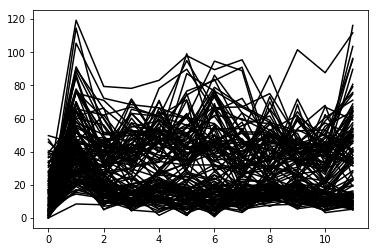

In [19]:
plt.plot(numpy.mean((error_sum[1:-1:2]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[2:-1:2]), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(error_sum[1:-1:2], axis = 0) + stat.sem(error_sum[1:-1:2]), numpy.mean(error_sum[1:-1:2], axis = 0) - stat.sem(error_sum[1:-1:2]), alpha = 0.5)
plot2 = plt.fill_between(range(12), numpy.mean(error_sum[2:-1:2], axis = 0) + stat.sem(error_sum[2:-1:2]), numpy.mean(error_sum[2:-1:2], axis = 0) - stat.sem(error_sum[2:-1:2]), alpha = 0.5)
plt.legend((plot1, plot2), ("Accuracy", "Speed"))
#error_sum[3]
#error_sum1
plt.xlabel('Block')
plt.ylabel('Error')

In [39]:
numpy.shape(numpy.mean(error_sum, axis = 2)[1::4])
#stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)

(15, 12)

In [76]:
def plot_error_means(errors, path):
    plt.rcParams[('figure.figsize')] = [8, 6]

    mean_errors = numpy.mean(error_sum, axis =2)
    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.title('Gradual Accuracy')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

    #y_lim_max = numpy.max((mean_errors)) + 5
    y_lim_max = 100
    plt.ylim((2, y_lim_max))
#    print(max(np.mean(quantiles[3::4][:, :, 3], axis = 0)[1:-1]) + 0.7)
    plt.tight_layout()
    #plt.savefig(path+'learning_GA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Gradual Speed')
    plt.ylim(2, y_lim_max)
    plt.tight_layout()
    #plt.savefig(path+'learning_GS.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Sudden Accuracy')
    plt.ylim(2, y_lim_max)
    plt.tight_layout()
    #plt.savefig(path+'learning_SA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.title('Sudden Speed')
    plt.ylim(2, y_lim_max)
    plt.tight_layout()
    #plt.savefig(path+'learning_SS.png', dpi = 600)
    plt.show()


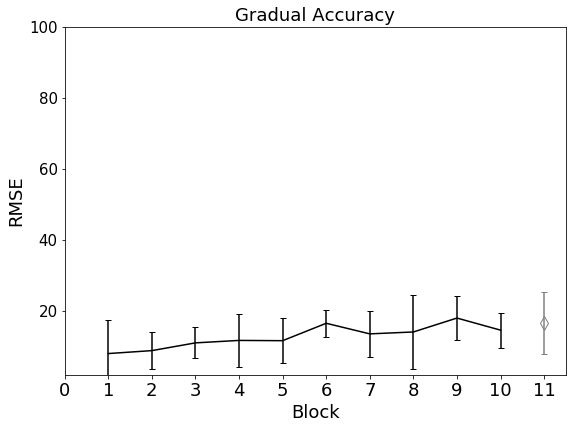

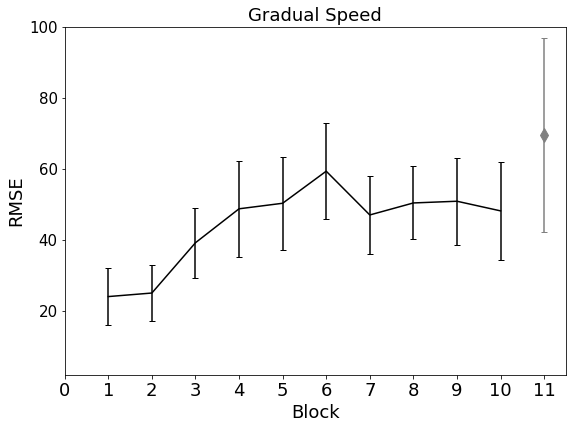

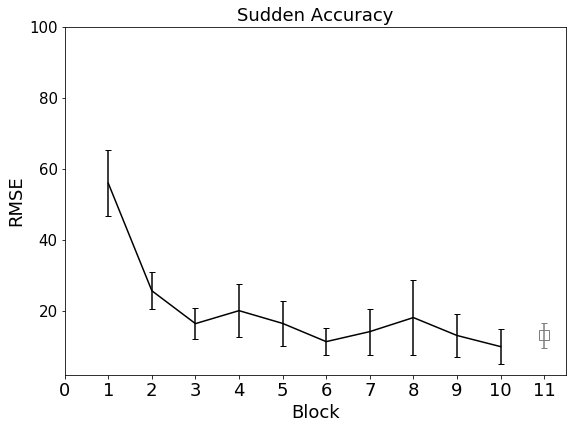

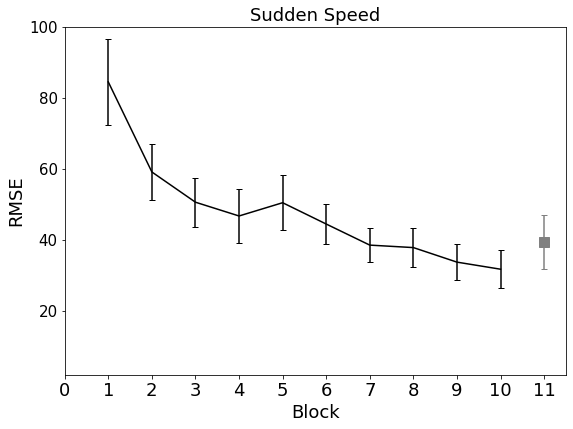

In [77]:
plot_error_means(error_sum, "C:/Users/Tejas/OneDrive/Research/Conferences and Papers/Psychonomics 2019/errors/")

In [96]:
numpy.mean(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
def plot_error_means_transfer(errors, text):
#    quantiles = get_quantile(total_times)
    xpos = [0, 1, 2, 3, 4]
    ymax = 100
    y = numpy.array([numpy.mean(numpy.mean(error_sum[1::4], axis = 2), axis = 0)[11],
                  numpy.mean(numpy.mean(error_sum[4::4], axis = 2), axis = 0)[11],
                  numpy.mean(numpy.mean(error_sum[3::4], axis = 2), axis = 0)[11],
                  numpy.mean(numpy.mean(error_sum[2::4], axis = 2), axis = 0)[11]] 
                  )
    y_sem = numpy.array([stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)[11], 
                    stat.sem(numpy.mean(error_sum[4::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.mean(error_sum[3::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.mean(error_sum[2::4], axis = 2), axis = 0)[11]])
    #print (y_sem[0])
    plt.ylim(0, ymax)
    plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, fill = False)
    plt.bar(1, y[1], yerr = y_sem[1], capsize = 3, color = [0.5, 0.5, 0.5])
    plt.bar(2, y[2], yerr = y_sem[2], capsize = 3, hatch = '\\', color = [0.5, 0.5, 0.5], fill = False)
    plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, hatch = '\\', color = [0.5, 0.5, 0.5])

#    handles = plt.bar(range(4), y, yerr = y_sem, capsize = 3, color = ['Blue', 'Green', 'Blue', 'Green'], alpha = [1, 0.5, 0.5, 1])
    plt.xticks([0, 1, 2, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
    plt.ylabel('Error (RMSE)')
    plt.xlabel('Condition')
    #plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
    plt.title(text)
    

#numpy.shape(numpy.mean(error_sum[1::4], axis = 0))

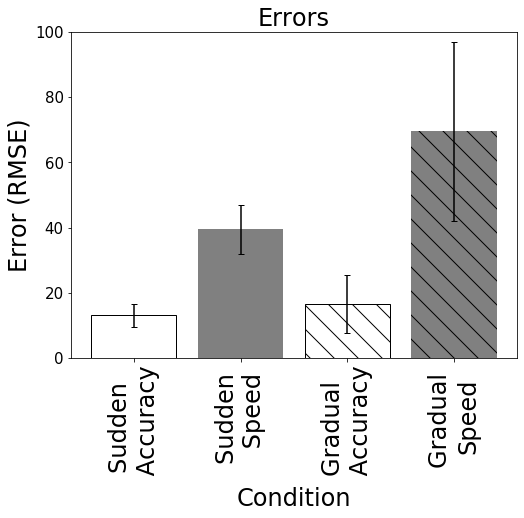

In [98]:
plot_error_means_transfer(error_sum, 'Errors')

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

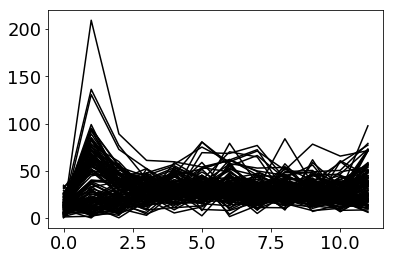

In [20]:
plt.plot(numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0), 'k-')
plt.plot(numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0) + stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))), numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0) - stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))), alpha = 0.5, color = 'red')
plot2 = plt.fill_between(range(12), numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0) + stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))), numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0) - stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))), alpha = 0.5, color = 'green')
plt.legend((plot1, plot2), ("Sudden", "Gradual"))
#error_sum[3]
#error_sum
plt.xlabel('Block')
plt.ylabel('Error')
#plot1.

In [ ]:
bar1 = (numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0)[1] - numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0)[0])/numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0)[0]
bar2 = (numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0)[-1] - numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0)[-2])/numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0)[-2]

In [ ]:
#numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0)[0]
numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0)[0]

In [ ]:
ybar = [numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0)[11] - numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0)[10], numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0)[11] - numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0)[10]]
#ybar = [numpy.mean(numpy.row_stack((error_sum[4:-1:4][:, -1], error_sum[1:-1:4][:, -1]))) - numpy.mean(numpy.concatenate((error_sum[4:-1:4][:, -2], error_sum[1:-1:4][:, -2]))), numpy.mean(numpy.concatenate((error_sum[4:-1:4][:, -1], error_sum[1:-1:4][:, -1]))) - numpy.mean(numpy.concatenate((error_sum[2:-1:4][:, -2], error_sum[3:-1:4][:, -2])))]
yerr = [stat.sem(numpy.concatenate((error_sum[4:-1:4][:, -1], error_sum[1:-1:4][:, -1]))) - stat.sem(numpy.concatenate((error_sum[4:-1:4][:, -2], error_sum[1:-1:4][:, -2]))), stat.sem(numpy.concatenate((error_sum[2:-1:4][:, -1], error_sum[3:-1:4][:, -1]))) - stat.sem(numpy.concatenate((error_sum[2:-1:4][:, -2], error_sum[3:-1:4][:, -2])))]
stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))[:, 11] - numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))[:, 10]), stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))[:, 11] - numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))[:, 10])
plt.bar(['Gradual', 'Sudden'], [ybar[1], ybar[0]], yerr = [yerr[1], yerr[0]])
plt.xlabel('Condition')
plt.ylabel('Errors')
plt.title('Error difference. Last block - Second last Block')

In [ ]:
ybar = [numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[2:-1:4])), axis = 0)[11] - numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[2:-1:4])), axis = 0)[10], numpy.mean(numpy.row_stack((error_sum[1:-1:4], error_sum[3:-1:4])), axis = 0)[11] - numpy.mean(numpy.row_stack((error_sum[1:-1:4], error_sum[3:-1:4])), axis = 0)[10]]
#ybar = [numpy.mean(numpy.row_stack((error_sum[4:-1:4][:, -1], error_sum[1:-1:4][:, -1]))) - numpy.mean(numpy.concatenate((error_sum[4:-1:4][:, -2], error_sum[1:-1:4][:, -2]))), numpy.mean(numpy.concatenate((error_sum[4:-1:4][:, -1], error_sum[1:-1:4][:, -1]))) - numpy.mean(numpy.concatenate((error_sum[2:-1:4][:, -2], error_sum[3:-1:4][:, -2])))]
yerr = [stat.sem(numpy.concatenate((error_sum[4:-1:4][:, -1], error_sum[2:-1:4][:, -1]))) - stat.sem(numpy.concatenate((error_sum[4:-1:4][:, -2], error_sum[2:-1:4][:, -2]))), stat.sem(numpy.concatenate((error_sum[1:-1:4][:, -1], error_sum[3:-1:4][:, -1]))) - stat.sem(numpy.concatenate((error_sum[1:-1:4][:, -2], error_sum[3:-1:4][:, -2])))]
yerr = [stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[2:-1:4]))[:, 11] - numpy.row_stack((error_sum[4:-1:4], error_sum[2:-1:4]))[:, 10]), stat.sem(numpy.row_stack((error_sum[1:-1:4], error_sum[3:-1:4]))[:, 11] - numpy.row_stack((error_sum[1:-1:4], error_sum[3:-1:4]))[:, 10])]
plt.bar(['Speed', 'Accuracy'], ybar, yerr = yerr)
plt.xlabel('Condition')
plt.ylabel('Errors')
plt.title('Error difference. Last block - Second last Block')
yerr

In [ ]:
stat.sem(error_sum[4:-1:4][:,11] - error_sum[4:-1:4][:,10])

In [ ]:
ybar = [numpy.mean(error_sum[2:-1:4], axis = 0)[11] - numpy.mean(error_sum[2:-1:4], axis = 0)[10], numpy.mean(error_sum[3:-1:4], axis = 0)[11] - numpy.mean(error_sum[3:-1:4], axis = 0)[10], numpy.mean(error_sum[4:-1:4], axis = 0)[11] - numpy.mean(error_sum[4:-1:4], axis = 0)[10], numpy.mean(error_sum[1:-1:4], axis = 0)[11] - numpy.mean(error_sum[1:-1:4], axis = 0)[10]]
#stat.sem((error_sum[4:-1:4][:, 11] - (error_sum[4:-1:4], error_sum[2:-1:4]))[:, 10]), stat.sem(numpy.row_stack((error_sum[1:-1:4], error_sum[3:-1:4]))[:, 11] - numpy.row_stack((error_sum[1:-1:4], error_sum[3:-1:4]))[:, 10])
yerr = [stat.sem(error_sum[4:-1:4][:, -1] - error_sum[4:-1:4][:, -2]), stat.sem(error_sum[1:-1:4][:, -1] - error_sum[1:-1:4][:, -2]), stat.sem(error_sum[2:-1:4][:, -1] - error_sum[2:-1:4][:, -2]), stat.sem(error_sum[3:-1:4][:, -1] - error_sum[3:-1:4][:, -2])]
yerr = [stat.sem(error_sum[2:-1:4][:,11] - error_sum[2:-1:4][:,10]), stat.sem(error_sum[3:-1:4][:,11] - error_sum[3:-1:4][:,10]), stat.sem(error_sum[4:-1:4][:,11] - error_sum[4:-1:4][:,10]), stat.sem(error_sum[1:-1:4][:,11] - error_sum[1:-1:4][:,10])]
handles = plt.bar([0, 1, 2, 3], ybar, yerr = yerr, color = ['Blue', 'Green', 'Blue', 'Green'])
plt.xlabel('Condition')
plt.ylabel('Errors')
plt.xticks([0.5, 2.5], ['Gradual', 'Sudden'])
plt.title('Error difference. Last block - Second last Block')
plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])

In [ ]:
#ybar = [error_sum[2:-1:4] - error_sum[2:-1:4][10], numpy.mean(error_sum[3:-1:4], axis = 0)[11] - numpy.mean(error_sum[3:-1:4], axis = 0)[10], numpy.mean(error_sum[4:-1:4], axis = 0)[11] - numpy.mean(error_sum[4:-1:4], axis = 0)[10], numpy.mean(error_sum[1:-1:4], axis = 0)[11] - numpy.mean(error_sum[1:-1:4], axis = 0)[10]]
y = [error_sum[2:-1:4][:, 11] - error_sum[2:-1:4][:, 10], error_sum[3:-1:4][:, 11] - error_sum[3:-1:4][:, 10], error_sum[4:-1:4][:, 11] - error_sum[4:-1:4][:, 10], error_sum[1:-1:4][:, 11] - error_sum[1:-1:4][:, 10]]
for i in y[3]:
    print (i)


In [ ]:
plt.plot(numpy.mean((error_sum[1:-1:4]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[2:-1:4]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[3:-1:4]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[4:-1:4]), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(error_sum[1:-1:2], axis = 0) + stat.sem(error_sum[1:-1:2]), numpy.mean(error_sum[1:-1:2], axis = 0) - stat.sem(error_sum[1:-1:2]), alpha = 0.5)
plot2 = plt.fill_between(range(12), numpy.mean(error_sum[2:-1:2], axis = 0) + stat.sem(error_sum[2:-1:2]), numpy.mean(error_sum[2:-1:2], axis = 0) - stat.sem(error_sum[2:-1:2]), alpha = 0.5)
plot3 = plt.fill_between(range(12), numpy.mean(error_sum[3:-1:2], axis = 0) + stat.sem(error_sum[3:-1:2]), numpy.mean(error_sum[3:-1:2], axis = 0) - stat.sem(error_sum[3:-1:2]), alpha = 0.5)
plot4 = plt.fill_between(range(12), numpy.mean(error_sum[4:-1:2], axis = 0) + stat.sem(error_sum[4:-1:2]), numpy.mean(error_sum[4:-1:2], axis = 0) - stat.sem(error_sum[4:-1:2]), alpha = 0.5)

plt.legend((plot1, plot2, plot3, plot4), ("AS", "SG", "AG", "SS"))
#error_sum[3]
#error_sum1
plt.xlabel('Block')
plt.ylabel('Error')

In [ ]:
all_errors1 = numpy.zeros((10, 64))
all_errors2 = numpy.zeros((10, 64))
for i in range(10):
    errors1 = errors(1, i)
    errors2 = errors(3, i)
    for j in range(64):
        all_errors1[i,j] = numpy.sum(errors1[j])
        all_errors2[i, j] = numpy.sum(errors2[j])
#numpy.sum(errors(1, 1))

In [ ]:
plt.axes([0, 0.6, 3, 1.5])
plt.plot(numpy.ravel(all_errors1))
plt.plot(numpy.ravel(all_errors2))


In [ ]:
lm = LinearRegression()
lm.fit(numpy.transpose([range(12)]), error_sum)

In [ ]:
lm.predict(11)


In [ ]:
error_sum[11]

In [ ]:
trial_errors = list()
for i in range(12):
    block_error = errors(1, i)
    for j in range(64):
        trial_errors.append(numpy.mean(block_error[j]))

In [ ]:
plt.plot(trial_errors)

In [ ]:
trial_errors = list()
for i in range(12):
    block_error = errors(2, i)
    for j in range(64):
        trial_errors.append(numpy.mean(block_error[j]))

In [ ]:
ax = plt.axes()
ax.plot(trial_errors)

Error, movement time and initiation time in the same plot.
Across groups
Collapse movements across subjects in the group

In [23]:
def times(data, block):
    initial_time = scipy.io.loadmat('data/participants/data{data}/initial_time/initial_time{block}.mat'.format(block=str(block), data=str(data)))
    movement_time = scipy.io.loadmat('data/participants/data{data}/movement_time/movement_time{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    initial_time = initial_time['initial_time'][:, 0]
    movement_time = movement_time['movement_time'][:, 0]
    return initial_time, movement_time


In [24]:
initial_times = numpy.zeros((27, 12))
movement_times = numpy.zeros((27, 12))

In [25]:
for participant in range(1,27):
    if participant == 7:
        continue
    for block in range(12):
        initial_time, movement_time = times(participant, block)
        initial_times[participant, block] = numpy.mean(initial_time['initial_time'])
        movement_times[participant, block] = numpy.mean(movement_time['movement_time'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
initial_times_mean_sudden = numpy.mean(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])), axis = 0)
initial_times_sem_sudden = stat.sem(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])))
plt.plot(initial_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(12), initial_times_mean_sudden + initial_times_sem_sudden, initial_times_mean_sudden - initial_times_sem_sudden, alpha = 0.5)


initial_times_mean_gradual = numpy.mean(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])), axis = 0)
initial_times_sem_gradual = stat.sem(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])))
plt.plot(initial_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(12), initial_times_mean_gradual + initial_times_sem_gradual, initial_times_mean_gradual - initial_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))
plt.xlabel('Block')
plt.ylabel('Initial Times')

In [ ]:
initial_times_mean_speed = numpy.mean(initial_times[2:-1:2], axis = 0)
initial_times_sem_speed = stat.sem(initial_times[2:-1:2])
plt.plot(initial_times_mean_speed, 'k-')
plot1 = plt.fill_between(range(12), initial_times_mean_speed + initial_times_sem_speed, initial_times_mean_speed - initial_times_sem_speed, alpha = 0.5, color = 'red')


initial_times_mean_accuracy = numpy.mean(initial_times[1:-1:2], axis = 0)
initial_times_sem_accuracy = stat.sem(initial_times[1:-1:2])
plt.plot(initial_times_mean_accuracy, 'k-')
plot2 = plt.fill_between(range(12), initial_times_mean_accuracy + initial_times_sem_accuracy, initial_times_mean_accuracy - initial_times_sem_accuracy, alpha = 0.5, color = 'green')

plt.legend((plot1, plot2), ("Speed", "Accuracy"))
plt.xlabel('Block')
plt.ylabel('Initial Time')

In [ ]:
initial_times_mean_speed_gradual = numpy.mean(initial_times[2:-1:4], axis = 0)
initial_times_sem_speed_gradual = stat.sem(initial_times[2:-1:4])
plt.plot(initial_times_mean_speed_gradual, 'k-')
plot1 = plt.fill_between(range(12), initial_times_mean_speed_gradual + initial_times_sem_speed_gradual, initial_times_mean_speed_gradual - initial_times_sem_speed_gradual, alpha = 0.5)

initial_times_mean_accuracy_gradual = numpy.mean(initial_times[3:-1:4], axis = 0)
initial_times_sem_accuracy_gradual = stat.sem(initial_times[3:-1:4])
plt.plot(initial_times_mean_accuracy_gradual, 'k-')
plot2 = plt.fill_between(range(12), initial_times_mean_accuracy_gradual + initial_times_sem_accuracy_gradual, initial_times_mean_accuracy_gradual - initial_times_sem_accuracy_gradual, alpha = 0.5)

initial_times_mean_speed_sudden = numpy.mean(initial_times[4:-1:4], axis = 0)
initial_times_sem_speed_sudden = stat.sem(initial_times[4:-1:4])
plt.plot(initial_times_mean_speed_sudden, 'k-')
plot3 = plt.fill_between(range(12), initial_times_mean_speed_sudden + initial_times_sem_speed_sudden, initial_times_mean_speed_sudden - initial_times_sem_speed_sudden, alpha = 0.5)

initial_times_mean_accuracy_sudden = numpy.mean(initial_times[1:-1:4], axis = 0)
initial_times_sem_accuracy_sudden = stat.sem(initial_times[1:-1:4])
plt.plot(initial_times_mean_accuracy_sudden, 'k-')
plot4 = plt.fill_between(range(12), initial_times_mean_accuracy_sudden + initial_times_sem_accuracy_sudden, initial_times_mean_accuracy_sudden - initial_times_sem_accuracy_sudden, alpha = 0.5)


plt.legend((plot1, plot2, plot3, plot4), ("SG", "AG", "SS", "AS"))
plt.xlabel('Block')
plt.ylabel('Initial Time')

In [ ]:
plt.bar(range(4), [initial_times_mean_accuracy_gradual[11] - initial_times_mean_accuracy_gradual[10], initial_times_mean_accuracy_sudden[11] - initial_times_mean_accuracy_sudden[10], initial_times_mean_speed_gradual[11] - initial_times_mean_speed_gradual[10], initial_times_mean_speed_sudden[11] - initial_times_mean_speed_sudden[10]])

In [ ]:
ybar = [numpy.mean(initial_times[1:-1:2][11] - initial_times[1:-1:2][10]), numpy.mean(initial_times[2:-1:2][11] - initial_times[2:-1:2][10])]
yerr = [stat.sem(initial_times[1:-1:2][11] - initial_times[1:-1:2][10]), stat.sem(initial_times[2:-1:2][11] - initial_times[2:-1:2][10])]
plt.bar(range(2), ybar, yerr = yerr)

In [ ]:
#numpy.mean(initial_times[1:-1:2][11])
#initial_times_mean_accuracy[11]
initial_times_mean_accuracy
initial_times[1:-1:2][11]
numpy.mean(initial_times[1:-1:2], axis = 0)

In [ ]:
plt.bar(range(2), [movement_times_mean_sudden[11] - movement_times_mean_sudden[10], movement_times_mean_gradual[11] - movement_times_mean_gradual[10]])

In [ ]:
movement_times_mean_sudden = numpy.mean(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])), axis = 0)
movement_times_sem_sudden = stat.sem(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])))
plt.plot(movement_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(12), movement_times_mean_sudden + movement_times_sem_sudden, movement_times_mean_sudden - movement_times_sem_sudden, alpha = 0.5)


movement_times_mean_gradual = numpy.mean(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])), axis = 0)
movement_times_sem_gradual = stat.sem(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])))
plt.plot(movement_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(12), movement_times_mean_gradual + movement_times_sem_gradual, movement_times_mean_gradual - movement_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))
plt.xlabel('Block')
plt.ylabel('Movement Times')

In [ ]:
movement_times_mean_speed = numpy.mean(movement_times[2:-1:2], axis = 0)
movement_times_sem_speed = stat.sem(movement_times[2:-1:2])
plt.plot(movement_times_mean_speed, 'k-')
plot1 = plt.fill_between(range(12), movement_times_mean_speed + movement_times_sem_speed, movement_times_mean_speed - movement_times_sem_speed, alpha = 0.5, color = 'red')


movement_times_mean_accuracy = numpy.mean(movement_times[1:-1:2], axis = 0)
movement_times_sem_accuracy = stat.sem(movement_times[1:-1:2])
plt.plot(movement_times_mean_accuracy, 'k-')
plot2 = plt.fill_between(range(12), movement_times_mean_accuracy + movement_times_sem_accuracy, movement_times_mean_accuracy - movement_times_sem_accuracy, alpha = 0.5, color = 'green')

plt.legend((plot1, plot2), ("Speed", "Accuracy"))
plt.xlabel('Block')
plt.ylabel('Movement Times')

In [ ]:
fig, plot1 = plt.subplots()
plot1.plot(numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0), 'k-')
plot1.plot(numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0) + stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))), numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0) - stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))), alpha = 0.5)
plot2 = plt.fill_between(range(12), numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0) + stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))), numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0) - stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))), alpha = 0.5)
plt.legend((plot1, plot2), ("Sudden", "Gradual"))
#error_sum[3]
#error_sum
plt.xlabel('Block')
plt.ylabel('Error')
#plot1.
plot3 = plot1.twinx()
initial_times_mean_sudden = numpy.mean(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])), axis = 0)
initial_times_sem_sudden = stat.sem(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])))
plt.plot(initial_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(10), initial_times_mean_sudden + initial_times_sem_sudden, initial_times_mean_sudden - initial_times_sem_sudden, alpha = 0.5)


initial_times_mean_gradual = numpy.mean(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])), axis = 0)
initial_times_sem_gradual = stat.sem(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])))
plt.plot(initial_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(10), initial_times_mean_gradual + initial_times_sem_gradual, initial_times_mean_gradual - initial_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))

movement_times_mean_sudden = numpy.mean(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])), axis = 0)
movement_times_sem_sudden = stat.sem(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])))
plt.plot(movement_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(10), movement_times_mean_sudden + movement_times_sem_sudden, movement_times_mean_sudden - movement_times_sem_sudden, alpha = 0.5)


movement_times_mean_gradual = numpy.mean(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])), axis = 0)
movement_times_sem_gradual = stat.sem(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])))
plt.plot(movement_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(10), movement_times_mean_gradual + movement_times_sem_gradual, movement_times_mean_gradual - movement_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))

In [ ]:
score = error_sum[:, 1]

In [ ]:
#speed emphasis is 1
emphasis = numpy.zeros(len(score))
emphasis[1:-1:2] = 1

condition = numpy.zeros(len(score))
condition[1:-1:4] = 1
condition[0:-1:4] = 1
condition

In [ ]:
numpy.savetxt('error_anova.csv', numpy.column_stack((emphasis, condition, score)), delimiter=",")


In [ ]:
lm = smf.OLS(score, numpy.column_stack((emphasis, condition))).fit()

In [ ]:
print (lm.summary())

In [ ]:
table = sm.stats.anova_lm(lm)


distance from target vs time quantiles

break blocks into 16 sets of trials

error vs groups of trials

Clean up data

In [ ]:
numpy.column_stack((initial_times[1:-1:4][1], initial_times[4:-1:4][1])) - numpy.column_stack((initial_times[1:-1:4][0], initial_times[4:-1:4][0]))

In [ ]:
numpy.concatenate((initial_times[1:-1:4,1], initial_times[4:-1:4, 1])) - numpy.concatenate((initial_times[1:-1:4,0], initial_times[4:-1:4, 0]))

In [ ]:
numpy.concatenate((initial_times[1:-1:4,11], initial_times[4:-1:4, 11])) - numpy.concatenate((initial_times[1:-1:4,10], initial_times[4:-1:4, 10]))

In [ ]:
def calc_dist(traj):    
    distance = list()
    for j in range(64):
        traj_dist = list()
        trajx, trajy = traj['x'][0][j][0], traj['y'][0][j][0]
        #end_pointx, end_pointy  = square_coord['squareX'][0][j], square_coord['squareY'][0][j]
        end_pointx, end_pointy  = traj['x'][0][j][0][-1], traj['y'][0][j][0][-1]


        for i in range(len(trajx)):
            xdist = numpy.absolute(end_pointx - trajx[i])
            ydist = numpy.absolute(end_pointy-trajy[i])
            dist = numpy.sqrt(xdist**2 + ydist**2)
            traj_dist.append(dist)
        distance.append(traj_dist)
    return distance
#dist = numpy.linalg.norm(numpy.cross(p2-p1, p1-p3))/numpy.linalg.norm(p2-p1)

In [ ]:
def distancevstime(data, block):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/participants/data{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    distance = calc_dist(traj)
    
    #error = xdiff**2+ydiff**2
    #print (error)
    distance_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(distance[i])
        for j in range(5):
            distance_means[i, j] = numpy.nanmean(distance[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
        #error_means[i, ] = error_means[i, ]/max(error_means[i,])

    
    time_means = numpy.zeros((64, 5))

    for i in range(64):
        n = len(distance[i])
        for j in range(5):
            time_means[i, j] = len(distance[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.nanmean(distance_means, axis = 0), xerr = stat.sem(time_means, axis = 0), yerr = stat.sem(distance_means, axis = 0))
    plt.ylabel('Distance')
    plt.xlabel('Time')
    #plt.xlim(0, 100)
    #plt.ylim(-20, 70)
    return times, numpy.nanmean(distance_means, axis = 0)

In [ ]:
distss = numpy.array([])
distas = numpy.array([])
distsg = numpy.array([])
distag = numpy.array([])
timess = numpy.array([])
timeas = numpy.array([])
timesg = numpy.array([])
timeag = numpy.array([])
data = 11
for participant in range(1, 27):
    if participant == 7:
        continue
    if participant%4 == 0:
        temp = distancevstime(participant, data)
        distss = numpy.concatenate((distss, temp[1]))
        timess = numpy.concatenate((timess, temp[0]))
    if participant%4 == 1:
        temp = distancevstime(participant, data)
        distas = numpy.concatenate((distas, temp[1]))
        timeas = numpy.concatenate((timeas, temp[0]))
    if participant%4 == 2:
        temp = distancevstime(participant, data)
        distsg = numpy.concatenate((distsg, temp[1]))
        timesg = numpy.concatenate((timesg, temp[0]))
    if participant%4 == 3:
        temp = distancevstime(participant, data)
        distag = numpy.concatenate((distag, temp[1]))
        timeag = numpy.concatenate((timeag, temp[0]))

#    distancevstime(16, 11)


In [ ]:
plot1, = plt.plot(numpy.nanmean(numpy.reshape(timess, (int(len(timess)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distss, (int(len(distss)/5), 5)), axis = 0))
plot2, = plt.plot(numpy.nanmean(numpy.reshape(timesg, (int(len(timesg)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distsg, (int(len(distsg)/5), 5)), axis = 0))
plot3, = plt.plot(numpy.nanmean(numpy.reshape(timeas, (int(len(timeas)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distas, (int(len(distas)/5), 5)), axis = 0))
plot4, = plt.plot(numpy.nanmean(numpy.reshape(timeag, (int(len(timeag)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distag, (int(len(distag)/5), 5)), axis = 0))

plt.legend((plot1, plot2, plot3, plot4), ('SS', 'SG', 'AS', 'AG'))
plt.xlabel('Time')
plt.ylabel('Distance to target')

# Fitting Wald
1. Wald simulator using current parameters generate samples
2. Calculate gsquared using actual data
2. Minimize gsquared error

1. Calculate quantile points from a wald simulator with current parameters.
2. Calculate observed frequencies based on these quantile points.
3. Calculate G-Squared with ideal frequencies in bins as expected frequencies

In [ ]:
def wald_simulator(boundary, drift, non_dec_time, num_samples):
    
    #time-steps of the random walk
    ts = 0.01
    #diffusion coefficient
    dc = 0.1
    scaled_drift = drift*ts
    scaled_standard_dev = numpy.sqrt((dc**2)*ts)
    rt = list()
    for i in range(num_samples):
        out = 0
        pos = 0
        count = 0
        while (out == 0):
            pos = pos + numpy.random.normal(scaled_drift, scaled_standard_dev, size = 1)
            count = count+1
            if pos > boundary:
                out = 1
        rt.append(count*ts - non_dec_time)
    return rt

In [ ]:
def wald_simulator_quantiles(param):
    boundary = param[0]
    drift = param[1]
    non_dec_time = param[2]
    rts = wald_simulator(boundary, drift, non_dec_time, 100)
    rt_quantiles = numpy.quantile(rts, [0.1, 0.3, 0.5, 0.7, 0.9])
    return rt_quantiles

In [ ]:
def param_constraint(param):
    penalty = 0
    if param[0] < 0:
        penalty += 100
        param[0] = 0.0001
    if param[1] < 0:
        penalty += 100
        param[1] = 0.0001
    if param[2] < 0:
        penalty += 100
        param[2] = 0.0001
        
    
    return param, penalty

In [ ]:
its = numpy.zeros((58, 10, 64))
for participant in range(1, 58):
    if participant == 7:
        continue
    for i in range(10):
        it, mt = times(participant, i+1)
        its[participant, i] = it['initial_time'][:, 0]

In [ ]:
#numpy.ravel(its[1])[numpy.ravel(its[1]) < 5]
plt.hist(numpy.ravel(its[4::2])[(numpy.ravel(its[4::2])<5) & (numpy.ravel(its[4::2])>0.1)],  bins = 500)

In [ ]:
plt.hist(wald_simulator(0.2, 0.3, min(numpy.ravel(its)), len(numpy.ravel(its))), bins = 500)

In [ ]:
it['initial_time'][:,0]

# MLE

In [ ]:
def wald_density(x, param):
    #print (param)
    dc = 0.1
    boundary = param[0]
    drift = param[1]
    if param[2] >= x:
        non_dec_time = x - 0.001
    else:
        non_dec_time = param[2]
    rt = x - non_dec_time
    mu = boundary/drift
    lamb = boundary**2/dc**2
    density = numpy.sqrt(lamb/(2*numpy.pi*rt**3)) * numpy.exp((-lamb*(rt - mu)**2)/(2*(mu**2)*rt))
    return density

In [ ]:
def wald_cummulative_density(x, param):
    cummulative_density = scipy.integrate.quad(wald_density, a=0, b=x, args = (param))
    return cummulative_density

In [ ]:
cummulative_density = scipy.integrate.quad(wald_density, a=0, b=1, args = ([0.1, 0.1, 0.1]))[0]


In [ ]:
cummulative_density

In [ ]:
def log_likelihood(param):
    #param, penalty = param_constraint(param)
    ll = -sum(numpy.log(wald_density(param, data)))
    return ll

In [ ]:
data = it['initial_time'][:,0]
x0 = [0.1, 0.1, 0.1]

In [ ]:
def calc_gsquared(param, observed):
    param, penalty = param_constraint(param)
    boundary = param[0]
    drift = param[1]
    non_dec_time = param[2]
    observed_frequencies = [0]
    expected_quantiles = wald_simulator_quantiles([boundary, drift, non_dec_time])
    #print (expected_quantiles)
    expected_frequencies = numpy.array([0.1, 0.2, 0.2, 0.2, 0.2, 0.1])*len(observed)
    for quantile in expected_quantiles:
        observed_frequencies.append(wald_cummulative_density(quantile, param)[0]*len(observed))
    observed_frequencies.append(len(observed))
    observed_frequencies = [t - s for s, t in zip(observed_frequencies, observed_frequencies[1:])]
    #print (expected_frequencies)
    #print (observed_frequencies)
    #print (expected_frequencies/observed_frequencies)
    g_squared = 2*sum(observed_frequencies*numpy.log(observed_frequencies/expected_frequencies))
    g_squared += penalty
    return g_squared

In [ ]:
calc_gsquared([0.6, 0.3, min(numpy.ravel(its))], numpy.ravel(its))

In [ ]:
optim = scipy.optimize.minimize(calc_gsquared, x0 = [0.6, 0.3, min(numpy.ravel(its) - 0.00001)], args=(numpy.ravel(its)), method='Nelder-Mead')

In [ ]:
optim.fun

In [ ]:
min(numpy.ravel(its))


In [ ]:
param_arr = numpy.zeros((58, 12, 3))
gsq_arr = numpy.zeros((58, 12))
for data in range(1, 58):
    if data == 7:
        continue
    for block in range(12):
        it, mt = times(data, block)
        initial_time = it['initial_time'][:,0][(it['initial_time'][:,0] < 5) & (it['initial_time'][:,0] > 0)]
        optim = scipy.optimize.minimize(calc_gsquared, x0 = [0.6, 0.3, min(initial_time)], args = (initial_time), method = 'Nelder-Mead')
        param_arr[data][block] = optim.x
        gsq_arr[data][block] = optim.fun
    print (data)

In [ ]:
it, mt = times(1, 1)

In [ ]:
plt.hist(it['initial_time'][:,0][(it['initial_time'][:,0] < 5) & (it['initial_time'][:,0] > 0)])

# Regression Analysis

In [26]:
its = numpy.zeros((58, 12, 64))
mts = numpy.zeros((58, 12, 64))
for participant in range(1,58):
    if participant == 7:
        continue
    for block in range(12):
        itmt = times(participant, block)
        it = itmt[0]
        mt = itmt[1]
        #print (it)
        #it = it['initial_time'][:,0]
        its[participant, block, :len(it)] = it
        mts[participant, block, :len(mt)] = mt
#it = it['initial_time'][:,0]

In [27]:
stat.linregress(range(10), numpy.mean(numpy.mean(numpy.row_stack((its[2::4], its[3::4])), axis = 2), axis = 0)[1:11])

LinregressResult(slope=0.00270625801868651, intercept=0.367407640262831, rvalue=0.44817103510488154, pvalue=0.1939449175582082, stderr=0.001908501899911763)

In [28]:
slope = numpy.zeros(12)
intercept = numpy.zeros(12)
rvalue = numpy.zeros(12)
pvalue = numpy.zeros(12)
stderr = numpy.zeros(12)
for block in range(12):
    m, c, r, p, s = stat.linregress(range(64), numpy.mean(numpy.row_stack((its[2::4], its[3::4]))[::, block], axis = 0))   
    slope[block] = m
    intercept[block] = c
    rvalue[block] = r
    pvalue[block] = p
    stderr[block] = s

In [ ]:
plt.plot(slope)
plt.title('Sudden: Slope within block vs Block')

## Linear Regression with Trial as a factor. Within Blocks.
### Speed and Accuracy (even/odd participant)
Here. Odd vs even index in the data. Similarly stored

In [ ]:
slope = numpy.zeros((2,12))
intercept = numpy.zeros((2,12))
r_value = numpy.zeros((2, 12)) 
p_value = numpy.zeros((2, 12)) 
std_err = numpy.zeros((2, 12))
for block in range(12):
    for i in range(2):
        m, c, r, p, serr = stats.linregress(range(64), numpy.mean(its[i::2], axis = 0)[block])
        slope[i, block] = m
        intercept[i, block] = c
        r_value[i, block] = r
        p_value[i, block] = p
        std_err[i, block] = serr

## Sudden vs Gradual (Participant number: 0, 1 vs 2, 3)
In this case array index 0, 3 vs 1, 2

Sudden stored in 0th index. Gradual in 1st index of the slope arrays

In [ ]:
slope = numpy.zeros((2,12))
intercept = numpy.zeros((2,12))
r_value = numpy.zeros((2, 12)) 
p_value = numpy.zeros((2, 12)) 
std_err = numpy.zeros((2, 12))
for block in range(12):
    for i in range(2):
        if i == 0:
            m, c, r, p, serr = stats.linregress(range(64), numpy.mean(numpy.row_stack((its[0::4], its[3::4])), axis = 0)[block])
            slope[i, block] = m
            intercept[i, block] = c
            r_value[i, block] = r
            p_value[i, block] = p
            std_err[i, block] = serr
        if i == 1:
            m, c, r, p, serr = stats.linregress(range(64), numpy.mean(numpy.row_stack((its[1::4], its[2::4])), axis = 0)[block])
            slope[i, block] = m
            intercept[i, block] = c
            r_value[i, block] = r
            p_value[i, block] = p
            std_err[i, block] = serr

In [ ]:
plt.plot(intercept[0])
plt.plot(intercept[1])

# Linear Regression with trial as a factor. Across blocks.
## Speed vs Accuracy. Even vs Odd Participant
Odd vs Even in this code. Stored accordingly. 

In [ ]:
slope = numpy.zeros(2)
intercept = numpy.zeros(2)
r_value = numpy.zeros(2) 
p_value = numpy.zeros(2) 
std_err = numpy.zeros(2)
for i in range(2):
    m, c, r, p, serr = stats.linregress(range(640), numpy.ravel(numpy.mean(its[i::2], axis = 0)[1:11]))
    slope[i] = m
    intercept[i] = c
    r_value[i] = r
    p_value[i] = p
    std_err[i] = serr

## Sudden Vs Gradual (Participant number 0, 1 vs 2, 3)
In this case, array index 0, 3 vs 1, 2

Sudden stored in 0th, gradual in 1st

In [ ]:
slope = numpy.zeros(2)
intercept = numpy.zeros(2)
r_value = numpy.zeros(2) 
p_value = numpy.zeros(2) 
std_err = numpy.zeros(2)
for i in range(2):
    if i == 0:
        m, c, r, p, serr = stats.linregress(range(640), numpy.ravel(numpy.mean(numpy.row_stack((its[0::4], its[3::4])), axis = 0)[1:11]))
        slope[i] = m
        intercept[i] = c
        r_value[i] = r
        p_value[i] = p
        std_err[i] = serr
    if i == 1:
        m, c, r, p, serr = stats.linregress(range(640), numpy.ravel(numpy.mean(numpy.row_stack((its[1::4], its[2::4])), axis = 0)[1:11]))
        slope[i] = m
        intercept[i] = c
        r_value[i] = r
        p_value[i] = p
        std_err[i] = serr

# Same analyses as above, but with errors
## Follow the same nomenclature

In [ ]:
p_value[1]

In [ ]:
numpy.shape(error_sum)


In [ ]:
len(e[1])

# Angular Policies

- A Policy would be Desired angle at each sample - Actual angle change from the previous step. 

- A Policy improved would be a reduction in that difference. This should be across trials/Blocks.

In [10]:
def policy_angles(data, block, trial):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))

    x = traj['x'][0][trial][0]
    y = traj['y'][0][trial][0]
    x = x[numpy.nonzero(x)]
    y = y[numpy.nonzero(y)]
    if len(x)<len(y):
        y = y[len(y) - len(x):]
    if len(y)<len(x):
        x = x[len(x) - len(y):]

    #print (len(x))
    #print (len(y))
    del_x = x[5:] - x[:-5]
    del_y = y[5:] - y[:-5]
    del_r = numpy.sqrt(del_x**2 + del_y**2)
    del_theta = numpy.arccos(del_x/del_r)

    dx = x[-1] - x[5:]
    dy = y[-1] - y[5:]

    req_dr = numpy.sqrt(dx.astype(float)**2 + dy.astype(float)**2)
    req_dtheta = numpy.arccos(dx/req_dr)
    #print (req_dtheta - del_theta)
#    plt.plot(numpy.quantile(req_dtheta-del_theta, [0.1, 0.3, 0.5, 0.7, 0.9]))
    #Return directions by quadrant of a cartesian plane.
    if x[-1] >=0 and y[-1] >=0:
        direction = 1
    elif x[-1] < 0 and y[-1] >= 0:
        direction = 2
    elif x[-1] < 0 and y[-1] < 0:
        direction = 3
    else:
        direction = 4
    return numpy.nanmean(numpy.abs(req_dtheta - del_theta)), stat.sem(numpy.abs(req_dtheta - del_theta), nan_policy='omit'), numpy.nanmean(del_theta), stat.sem(del_theta), direction
    

In [11]:
mean_policy_angles = numpy.zeros((59, 12, 64))
sem_policy_angles = numpy.zeros((59, 12, 64))
del_theta = numpy.zeros((59, 12, 64))
del_theta_sem = numpy.zeros((59, 12, 64))
direction = numpy.zeros((59, 12, 64))
for participant in range(1, 59):
    if participant == 7:
        continue
    for block in range(12):
        for trial in range(64):
            mean_policy_angles[participant, block, trial], sem_policy_angles[participant, block, trial], del_theta[participant, block, trial], del_theta_sem[participant, block, trial], direction[participant, block, trial] = policy_angles(participant, block, trial)

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


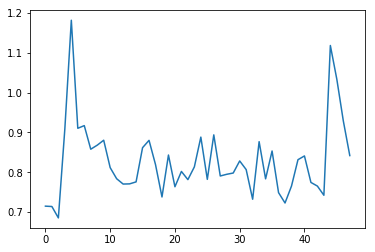

In [14]:
insert_zeros = numpy.zeros((12, 4, 4))
del_theta_1 = numpy.reshape(del_theta[direction==1], (57, 12, 4, 4))
del_theta_1 = numpy.insert(del_theta_1, [0, 6], insert_zeros, axis = 0)

#numpy.nanmean(numpy.reshape(del_theta, (59, 12, 4, 16))[numpy.reshape(direction, (59, 12, 4, 16)) == 1], axis = 3)
block_del_theta_1 = numpy.reshape(numpy.nanmean(numpy.reshape(del_theta_1, (59, 12, 4, 4)), axis = 3), (59, 48))
numpy.shape(block_del_theta_1)
plt.plot(numpy.nanmean(block_del_theta_1[4::4], axis = 0))

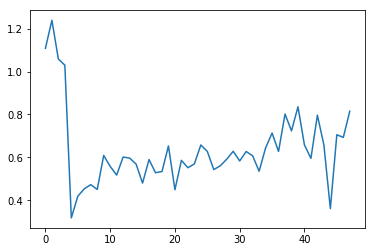

In [25]:
insert_zeros = numpy.zeros((12, 4, 4))
del_theta_2 = numpy.reshape(del_theta[direction==2], (57, 12, 4, 4))
del_theta_2 = numpy.insert(del_theta_2, [0, 6], insert_zeros, axis = 0)

#numpy.nanmean(numpy.reshape(del_theta, (59, 12, 4, 16))[numpy.reshape(direction, (59, 12, 4, 16)) == 1], axis = 3)
block_del_theta_2 = numpy.reshape(numpy.nanmean(numpy.reshape(del_theta_2, (59, 12, 4, 4)), axis = 3), (59, 48))
numpy.shape(block_del_theta_2)
plt.plot(numpy.nanmean(block_del_theta_2[4::4] - numpy.pi/2, axis = 0))

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


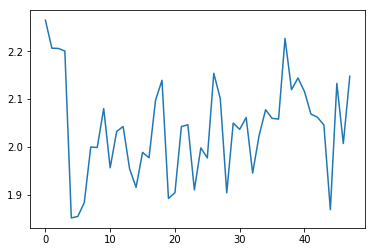

In [17]:
insert_zeros = numpy.zeros((12, 4, 4))
del_theta_3 = numpy.reshape(del_theta[direction==3], (57, 12, 4, 4))
del_theta_3 = numpy.insert(del_theta_3, [0, 6], insert_zeros, axis = 0)

#numpy.nanmean(numpy.reshape(del_theta, (59, 12, 4, 16))[numpy.reshape(direction, (59, 12, 4, 16)) == 1], axis = 3)
block_del_theta_3 = numpy.reshape(numpy.nanmean(numpy.reshape(del_theta_3, (59, 12, 4, 4)), axis = 3), (59, 48))
numpy.shape(block_del_theta_3)
plt.plot(numpy.nanmean(block_del_theta_3[4::4], axis = 0))

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


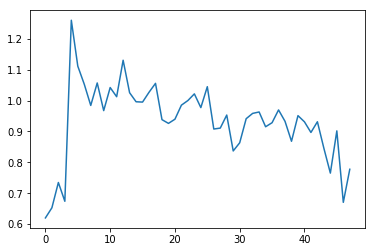

In [18]:
insert_zeros = numpy.zeros((12, 4, 4))
del_theta_4 = numpy.reshape(del_theta[direction==4], (57, 12, 4, 4))
del_theta_4 = numpy.insert(del_theta_4, [0, 6], insert_zeros, axis = 0)

#numpy.nanmean(numpy.reshape(del_theta, (59, 12, 4, 16))[numpy.reshape(direction, (59, 12, 4, 16)) == 1], axis = 3)
block_del_theta_4 = numpy.reshape(numpy.nanmean(numpy.reshape(del_theta_4, (59, 12, 4, 4)), axis = 3), (59, 48))
numpy.shape(block_del_theta_4)
plt.plot(numpy.nanmean(block_del_theta_4[4::4], axis = 0))

### Policies

Text(0.5, 1.0, 'Sudden Speed')

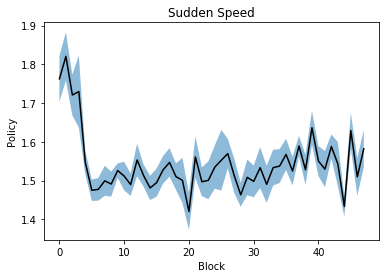

In [252]:
block_del_theta_sudden_speed = numpy.mean(block_del_theta[4::4], axis = 0)
bdtss_sem = stat.sem(block_del_theta[4::4], axis = 0)
plt.plot(range(48), block_del_theta_sudden_speed, 'k-')
plt.fill_between(range(48), block_del_theta_sudden_speed+bdtss_sem, block_del_theta_sudden_speed-bdtss_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Policy')
plt.title('Sudden Speed')

Text(0.5, 1.0, 'Sudden Accuracy')

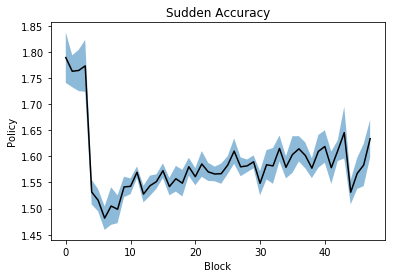

In [253]:
block_del_theta_sudden_accuracy = numpy.mean(block_del_theta[1::4], axis = 0)
bdtsa_sem = stat.sem(block_del_theta[1::4], axis = 0)
plt.plot(range(48), block_del_theta_sudden_accuracy, 'k-')
plt.fill_between(range(48), block_del_theta_sudden_accuracy+bdtsa_sem, block_del_theta_sudden_accuracy-bdtsa_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Policy')
plt.title('Sudden Accuracy')

Text(0.5, 1.0, 'Gradual Speed')

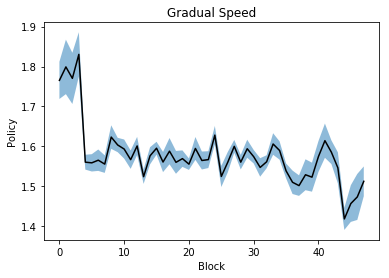

In [254]:
block_del_theta_gradual_speed = numpy.mean(block_del_theta[2::4], axis = 0)
bdtgs_sem = stat.sem(block_del_theta[2::4], axis = 0)
plt.plot(range(48), block_del_theta_gradual_speed, 'k-')
plt.fill_between(range(48), block_del_theta_gradual_speed+bdtgs_sem, block_del_theta_gradual_speed-bdtgs_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Policy')
plt.title('Gradual Speed')

Text(0.5, 1.0, 'Gradual Accuracy')

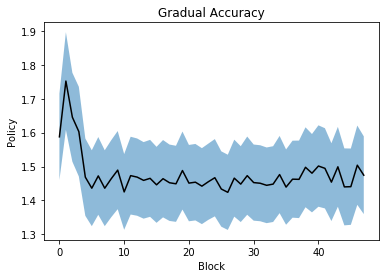

In [255]:
block_del_theta_gradual_accuracy = numpy.mean(block_del_theta[3::4], axis = 0)
bdtga_sem = stat.sem(block_del_theta[3::4], axis = 0)
plt.plot(range(48), block_del_theta_gradual_accuracy, 'k-')
plt.fill_between(range(48), block_del_theta_gradual_accuracy+bdtga_sem, block_del_theta_gradual_accuracy-bdtga_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Policy')
plt.title('Gradual Accuracy')

In [240]:
block_policy = numpy.nanmean(mean_policy_angles, axis = 2)
#Divide blocks in 4 sets of 16 trials each
block_policy = numpy.reshape(numpy.nanmean(numpy.reshape(mean_policy_angles, (59, 12, 4, 16)), axis = 3), (59, 48))
numpy.shape(block_policy)


(59, 48)

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


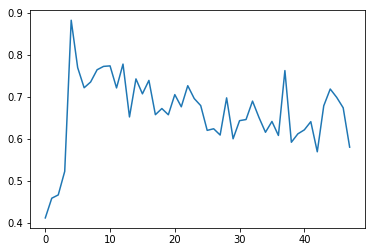

In [23]:
insert_zeros = numpy.zeros((12, 4, 4))
mean_policy_angles_1 = numpy.reshape(mean_policy_angles[direction==1], (57, 12, 4, 4))
mean_policy_angles_1 = numpy.insert(mean_policy_angles_1, [0, 6], insert_zeros, axis = 0)
mean_policy_angles_2 = numpy.reshape(mean_policy_angles[direction==2], (57, 12, 4, 4))
mean_policy_angles_2 = numpy.insert(mean_policy_angles_2, [0, 6], insert_zeros, axis = 0)
mean_policy_angles_3 = numpy.reshape(mean_policy_angles[direction==3], (57, 12, 4, 4))
mean_policy_angles_3 = numpy.insert(mean_policy_angles_3, [0, 6], insert_zeros, axis = 0)
mean_policy_angles_4 = numpy.reshape(mean_policy_angles[direction==4], (57, 12, 4, 4))
mean_policy_angles_4 = numpy.insert(mean_policy_angles_4, [0, 6], insert_zeros, axis = 0)

#numpy.nanmean(numpy.reshape(del_theta, (59, 12, 4, 16))[numpy.reshape(direction, (59, 12, 4, 16)) == 1], axis = 3)
mean_policy_angles_direction_normalized
mean_policy_angles_1 = numpy.reshape(numpy.nanmean(numpy.reshape(mean_policy_angles_1, (59, 12, 4, 4)), axis = 3), (59, 48))
numpy.shape(mean_policy_angles_1)
plt.plot(numpy.nanmean(mean_policy_angles_1[4::4], axis = 0))

Text(0.5, 1.0, 'Sudden Speed')

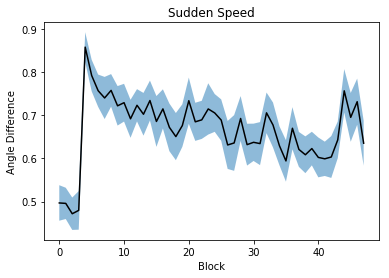

In [33]:
block_policy_sudden_speed = numpy.mean(block_policy[4::4], axis=0)
bpss_sem = stat.sem(block_policy[4::4], axis = 0)
plt.plot(range(48), block_policy_sudden_speed, 'k-')
plt.fill_between(range(48), block_policy_sudden_speed+bpss_sem, block_policy_sudden_speed-bpss_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Angle Difference')
plt.title('Sudden Speed')

Text(0.5, 1.0, 'Sudden Accuracy')

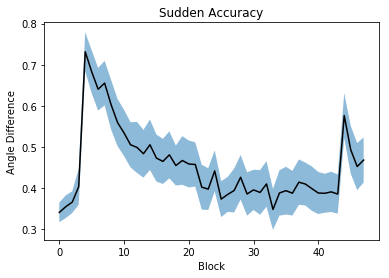

In [34]:
block_policy_sudden_accuracy = numpy.mean(block_policy[1::4], axis = 0)
bpsa_sem = stat.sem(block_policy[1::4], axis = 0)
plt.plot(block_policy_sudden_accuracy, 'k-')
plt.fill_between(range(48), block_policy_sudden_accuracy+bpsa_sem, block_policy_sudden_accuracy-bpsa_sem ,alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Angle Difference')
plt.title('Sudden Accuracy')

Text(0.5, 1.0, 'Gradual Speed')

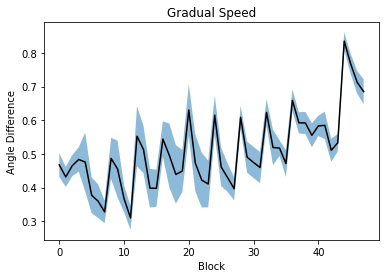

In [35]:
block_policy_gradual_speed = numpy.mean(block_policy[2::4], axis = 0)
bpgs_sem = stat.sem(block_policy[2::4], axis = 0)
plt.plot(block_policy_gradual_speed, 'k-')
plt.fill_between(range(48), block_policy_gradual_speed+bpgs_sem, block_policy_gradual_speed-bpgs_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Angle Difference')
plt.title('Gradual Speed')

Text(0.5, 1.0, 'Gradual Accuracy')

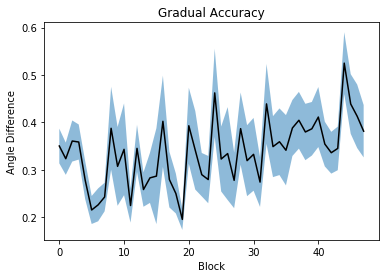

In [36]:
block_policy_gradual_accuracy = numpy.mean(block_policy[3::4], axis = 0)
bpga_sem = stat.sem(block_policy[3::4], axis = 0)
plt.plot(block_policy_gradual_accuracy, 'k-')
plt.fill_between(range(48), block_policy_gradual_accuracy+bpga_sem, block_policy_gradual_accuracy-bpga_sem, alpha = 0.5)
plt.xlabel('Block')
plt.ylabel('Angle Difference')
plt.title('Gradual Accuracy')

In [37]:
numpy.shape(error_sum)

NameError: name 'error_sum' is not defined

In [72]:
block_error = numpy.mean(error_sum, axis = 2)

In [73]:
block_error_sudden_speed = numpy.mean(block_error[4::4], axis = 0)

Text(0.5, 1.0, 'Sudden Speed')

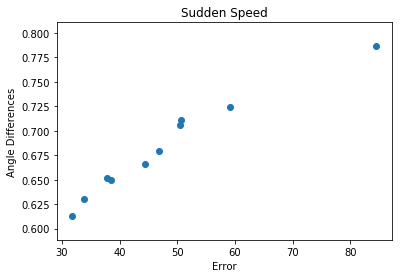

In [101]:
plt.scatter(block_error_sudden_speed[1:-1], block_policy_sudden_speed[1:-1])
plt.ylabel("Angle Differences")
plt.xlabel("Error")
plt.title("Sudden Speed")

Text(0.5, 1.0, 'Sudden Accuracy')

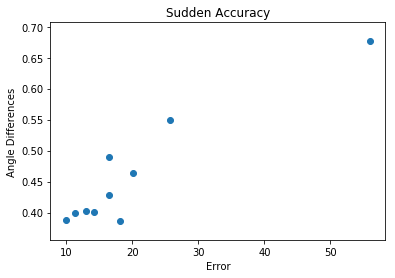

In [104]:
block_error_sudden_accuracy = numpy.mean(block_error[1::4], axis = 0)
plt.scatter(block_error_sudden_accuracy[1:-1], block_policy_sudden_accuracy[1:-1])
plt.ylabel("Angle Differences")
plt.xlabel("Error")
plt.title("Sudden Accuracy")

Text(0.5, 1.0, 'Gradual Speed')

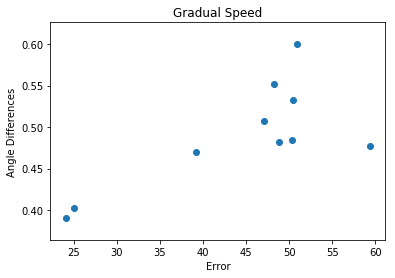

In [105]:
block_error_gradual_speed = numpy.mean(block_error[2::4], axis = 0)
plt.scatter(block_error_gradual_speed[1:-1], block_policy_gradual_speed[1:-1])
plt.ylabel("Angle Differences")
plt.xlabel("Error")
plt.title("Gradual Speed")

Text(0.5, 1.0, 'Gradual Accuracy')

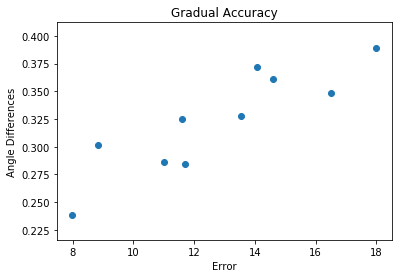

In [108]:
block_error_gradual_accuracy = numpy.mean(block_error[3::4], axis = 0)
plt.scatter(block_error_gradual_accuracy[1:-1], block_policy_gradual_accuracy[1:-1])
plt.ylabel("Angle Differences")
plt.xlabel("Error")
plt.title("Gradual Accuracy")

In [79]:
from mpl_toolkits.mplot3d import Axes3D



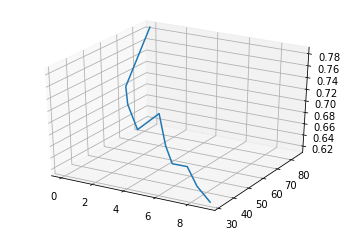

In [96]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(range(10), block_error_sudden_speed[1:-1], block_policy_sudden_speed[1:-1])


Value = (1 - alpha)*(1/error) + (alpha)*(1/Total time)

In [19]:
def get_times():
    initial_times = numpy.zeros((59, 12, 64))
    movement_times = numpy.zeros((59, 12, 64))
    for participant in range(1, 59):
        if participant == 7:
            continue
        else:
            for block in range(12):
                it, mt = times(participant, block)
                initial_times[participant, block] = it
                movement_times[participant, block] = mt
    return initial_times, movement_times

In [20]:
initial_times, movement_times = get_times()

In [49]:
def get_value(alpha, beta):
    error_sum[error_sum == 0] = 0.01
    initial_times[initial_times == 0] = 0.01
    movement_times[movement_times == 0] = 0.01
    errors = error_sum/numpy.max(error_sum)
    itz = initial_times/numpy.max(initial_times)
    mtz = movement_times/numpy.max(movement_times)
    value = alpha*(1/errors) + beta*(1/(itz+mtz))
    return value, errors, itz+mtz

In [60]:
value, error_all, time_all = get_value(0.5, 0.05)
numpy.shape(error_all)

(59, 12, 64)

In [43]:
block_value = numpy.reshape(numpy.nanmean(numpy.reshape(value, (59, 12, 4, 16)), axis = 3), (59, 48))

array([[1.32118838e-01, 1.73496961e-04, 6.37572528e-02, 1.39750141e-01,
        1.31603239e-01, 8.69009680e-02, 1.81099058e-04, 1.47850223e-04,
        2.04450002e-04, 2.58485385e-04, 1.71249452e-04, 8.76488717e-05,
        1.29809115e-04, 1.71580405e-04, 1.39406818e-04, 1.13171030e-04,
        1.34836704e-04, 9.84109738e-05, 1.36035876e-04, 1.26617077e-04,
        1.08958404e-04, 1.21684736e-04, 1.00482513e-04, 1.60164052e-04,
        6.80867234e-05, 1.87156380e-04, 1.15874926e-04, 1.01466396e-04,
        7.07757543e-02, 1.88418318e-02, 1.87912581e-04, 2.03867259e-04,
        9.04075884e-02, 1.43855230e-04, 1.58141755e-04, 1.46267155e-02,
        1.23887854e-02, 1.40340723e-04, 1.59400511e-04, 9.89830720e-05,
        1.20530306e-04, 1.51060884e-04, 5.87395407e-05, 1.06196531e-04,
        2.16973278e-04, 9.88450761e-05, 1.93185549e-04, 2.25369358e-04,
        1.51745635e-04, 1.74975044e-04, 1.06547137e-04, 1.04596639e-04,
        4.47286003e-04, 2.61829349e-04, 1.79507377e-04, 1.181562

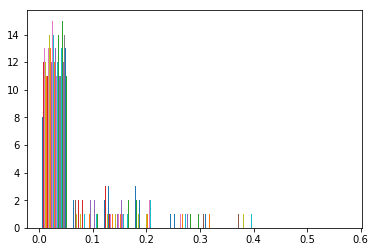

In [78]:
#plt.scatter(error_all[1::4, 2, :], time_all[1::4, 2, :])
#plt.scatter(error_all[2::4, 2, :], time_all[2::4, 2, :])
#plt.scatter(error_all[3::4, 2, :], time_all[3::4, 2, :])
#plt.scatter(error_all[4::4, 2, :], time_all[4::4, 2, :])
plt.hist(error_all[2::4, 2, :], bins=10)
error_all[2::4, 2, :]

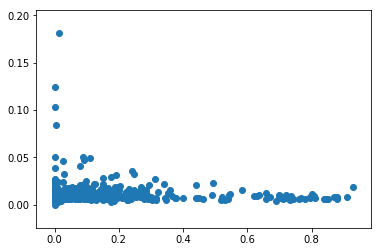

In [63]:
plt.scatter(error_all[2::4, 11, :], time_all[2::4, 11, :])


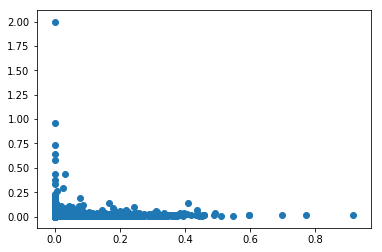

In [58]:
plt.scatter(error_all[3::4], time_all[3::4])


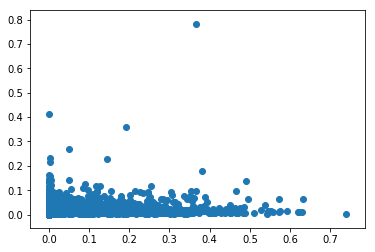

In [59]:
plt.scatter(error_all[4::4], time_all[4::4])


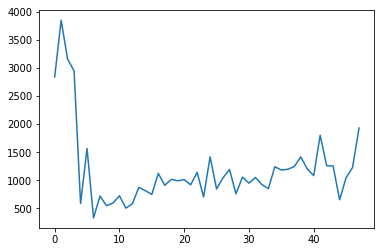

In [48]:
plt.plot(numpy.mean(block_value[4::4], axis = 0))

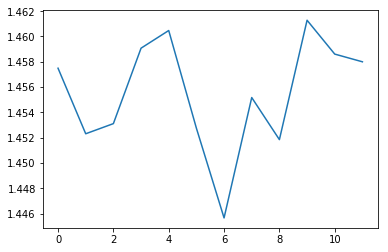

In [97]:
plt.plot(numpy.mean(numpy.nanmean(del_theta[3::4], axis = 0), axis = 1))

In [89]:
numpy.shape(del_theta)

(59, 12, 64)

# Curvatures

In [103]:
def calc_angle(current_point, next_point, final_point):
    vec1 = next_point - current_point
    vec2 = final_point - current_point
    cos_theta = numpy.dot(vec1, vec2)/(numpy.linalg.norm(vec1) * numpy.linalg.norm(vec2))
    theta = numpy.degrees(numpy.arccos(cos_theta))
    return theta

In [104]:
def calc_curvature(data, block, trial):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    trajx, trajy = traj['x'][0][trial][0], traj['y'][0][trial][0]
    targetx, targety = trajx[-1], trajy[-1]
    angles = list()
    for i in range(len(trajx[:-1])):
        #print (trajx[i], trajy[i])
        angles.append(calc_angle(numpy.array([trajx[i], trajy[i]]), numpy.array([trajx[i+1], trajy[i+1]]), numpy.array([trajx[-1], trajy[-1]])))
    return numpy.nanmedian(angles)

In [106]:
curvatures = numpy.zeros((58, 12, 64))
for data in range(1, 59):
    if data == 7:
        continue
    for block in range(12):
        for trial in range(64):
            curvatures[data][block][trial] = calc_curvature(data, block, trial)
    if data%10 == 0:
        print (data)

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


10
20
30
40


C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


50


IndexError: index 58 is out of bounds for axis 0 with size 58

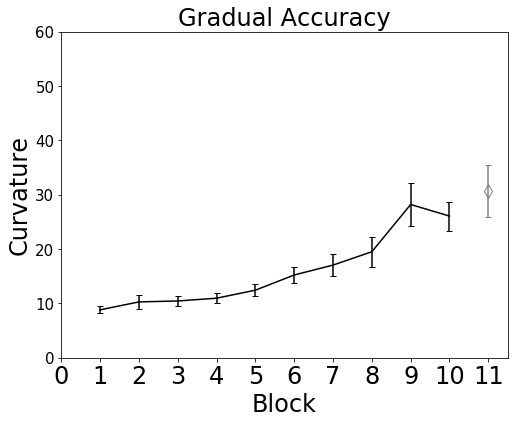

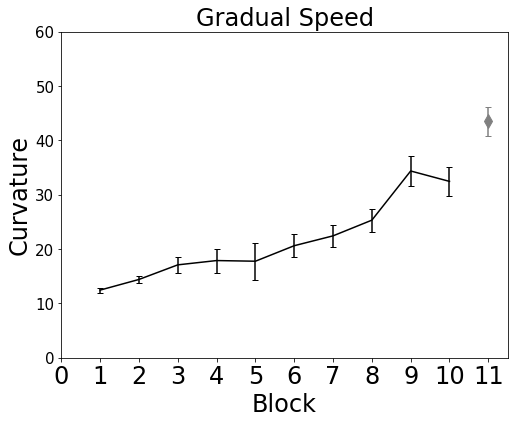

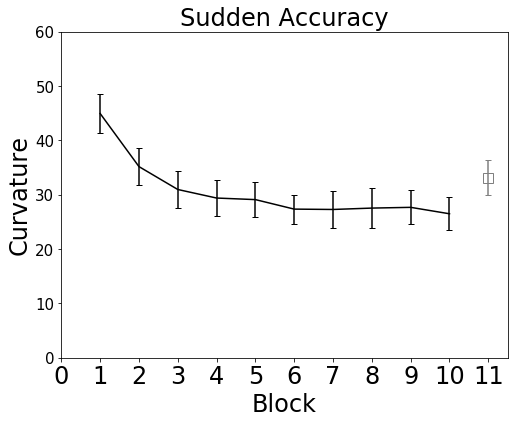

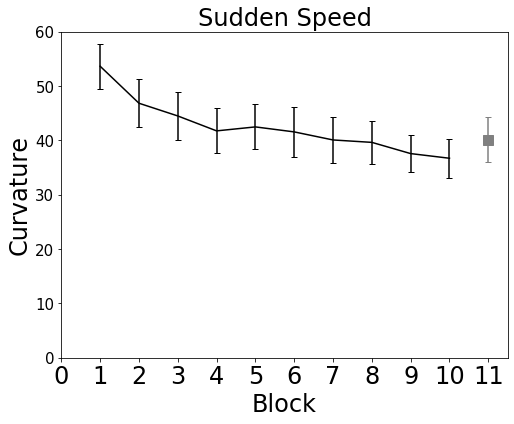

In [107]:
def plot_curvature_means(distances, path):
    #plt.rcParams[('figure.figsize')] = [8, 6]

    mean_errors = numpy.mean(distances, axis =2)
    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[3::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[3::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[3::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[3::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.title('Gradual Accuracy')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

    #y_lim_max = numpy.max((mean_errors)) + 5
    y_lim_max = 60
    plt.ylim((0, y_lim_max))
#    print(max(np.mean(quantiles[3::4][:, :, 3], axis = 0)[1:-1]) + 0.7)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[2::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[2::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[2::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[2::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Gradual Speed')
    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GS.png', dpi = 600)
    plt.show()
    #y_lim_max = 2200

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[1::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(distances, axis = 2)[1::4], axis = 0)[0], yerr = stat.sem(numpy.mean(distances, axis = 2)[1::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[1::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Sudden Accuracy')
    #y_lim_max = 10000

    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[4::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[4::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[4::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[4::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.title('Sudden Speed')
#    y_lim_max = 2600
    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SS.png', dpi = 600)
    plt.show()

plot_curvature_means(curvatures, "")


[33.10598662 37.48046922 33.09342599 43.48330066]


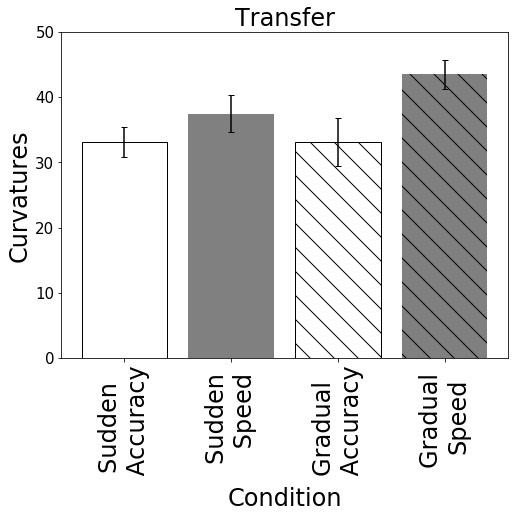

In [139]:
#numpy.mean(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
#stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
def plot_curvature_means_transfer(distances, text):
#    quantiles = get_quantile(total_times)
    a = numpy.nanmean(curvatures[11::4], axis = 2)
    b = numpy.nanmean(curvatures[3], axis = 1)
    c = numpy.insert(a, 0, b, axis = 0)
    xpos = [0, 1, 2, 3, 4]
    y = numpy.array([numpy.mean(numpy.nanmean(distances[1::4], axis = 2), axis = 0)[11],# - numpy.mean(numpy.median(distances[1::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.nanmean(distances[0::4], axis = 2), axis = 0)[11], #- numpy.mean(numpy.median(distances[4::4], axis = 2), axis = 0)[10],
                  numpy.mean(c, axis = 0)[11], #- numpy.mean(numpy.median(distances[3::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.nanmean(distances[2::4], axis = 2), axis = 0)[11]] #- numpy.mean(numpy.median(distances[2::4], axis = 2), axis = 0)[10]] 
                  )
    y_sem = numpy.array([stat.sem(numpy.nanmean(distances[1::4], axis = 2), axis = 0)[11], 
                    stat.sem(numpy.nanmean(distances[4::4], axis = 2), axis = 0)[11],
                    stat.sem(c, axis = 0)[11],
                    stat.sem(numpy.nanmean(distances[2::4], axis = 2), axis = 0)[11]])
    #print (y_sem[0])
    #y_sem = numpy.array([0, 0, 0, 0])
    plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, fill = False)
    plt.bar(1, y[1], yerr = y_sem[1], capsize = 3, color = [0.5, 0.5, 0.5])
    plt.bar(2, y[2], yerr = y_sem[2], capsize = 3, hatch = '\\', fill = False)
    plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, hatch = '\\', color = [0.5, 0.5, 0.5])

#    handles = plt.bar(range(4), y, yerr = y_sem, capsize = 3, color = ['Blue', 'Green', 'Blue', 'Green'], alpha = [1, 0.5, 0.5, 1])
    plt.xticks([0, 1, 2, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
    plt.ylabel('Curvatures')
    plt.xlabel('Condition')
    #plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
    plt.title(text)
    plt.ylim(0, 50)
    print (y)
#numpy.shape(numpy.mean(error_sum[1::4], axis = 0))
plot_curvature_means_transfer(curvatures, 'Transfer')

In [137]:
#numpy.shape(numpy.hstack((numpy.nanmean(curvatures[3], axis = 1), numpy.nanmean(curvatures[11::4], axis = 2))))


array([[26.84557155,  7.49826627,  9.12180713, 12.23139503, 11.05237681,
        13.84443429, 17.03781035, 16.32442889, 23.95325017, 33.06848892,
        29.86195917, 39.6419053 ],
       [26.03705719, 12.05239307, 10.5778788 ,  8.47653698,  7.75974259,
         8.66939953, 12.60084098, 12.2505728 , 16.58673152, 24.45138532,
        33.05953283, 38.53506049],
       [23.5230576 ,  5.21207683,  6.42925045,  9.24257716,  7.00499767,
         7.56021917,  9.21832469,  9.23518147, 11.7167934 , 23.46051281,
        24.3031848 , 27.9129545 ],
       [25.23766089,  9.43860791,  8.47643224,  9.10616708, 11.55279688,
        13.79658384, 19.07482314, 22.17947073, 20.79629595, 29.86335284,
        26.65397517, 26.0528473 ],
       [25.43580324, 11.65909418, 10.53298803, 11.99760323, 16.8674371 ,
        19.62647369, 19.56061099, 19.10973784, 21.72137506, 24.16430128,
        23.23520083, 23.29020419],
       [20.61482309,  8.01357971,  9.21564509, 12.31906578, 14.80918339,
        18.10919459, 1